In [93]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sn
import pickle

import warnings
warnings.filterwarnings('ignore')

In [94]:
data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [95]:
data.shape

(1338, 7)

In [98]:
data.describe()
# By seeing the data there is no null values and there are words we will treat it and change to numbers

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [99]:
from sklearn.preprocessing import OrdinalEncoder

In [100]:
ord_encoder = OrdinalEncoder(categories = [['male','female'],['yes','no'],['northeast','southeast','northwest','southwest']])
df1 = ord_encoder.fit_transform(data[['sex','smoker','region']])
df1

array([[1., 0., 3.],
       [0., 1., 1.],
       [0., 1., 1.],
       ...,
       [1., 1., 1.],
       [1., 1., 3.],
       [1., 0., 2.]])

In [101]:
data[['sex','smoker','region']] = df1
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1.0,27.900,0,0.0,3.0,16884.92400
1,18,0.0,33.770,1,1.0,1.0,1725.55230
2,28,0.0,33.000,3,1.0,1.0,4449.46200
3,33,0.0,22.705,0,1.0,2.0,21984.47061
4,32,0.0,28.880,0,1.0,2.0,3866.85520


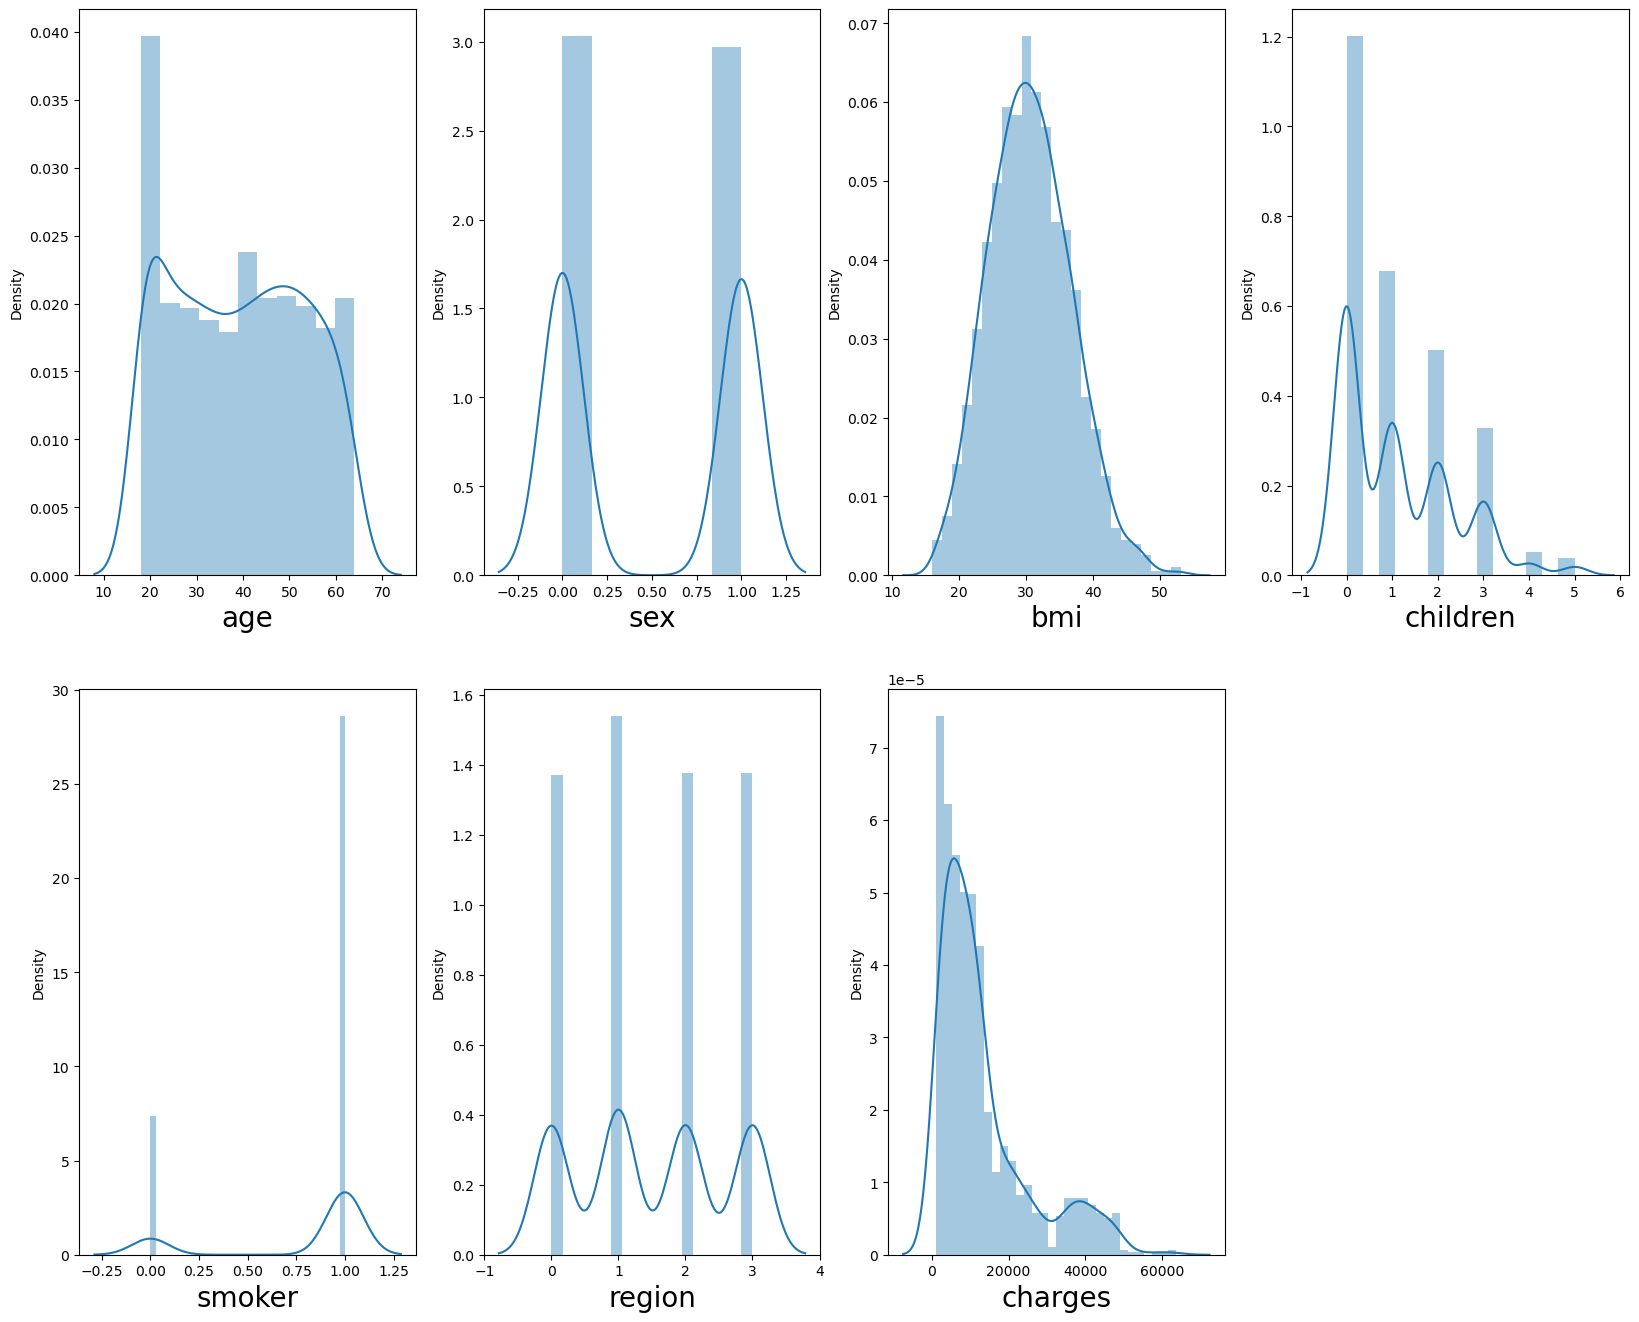

In [102]:
plt.figure(figsize=(20,25))
plotnumber = 1

for column in data:
    if plotnumber <= 7 :
        ax = plt.subplot(3,4,plotnumber)
        sn.distplot(data[column])
        plt.xlabel(column,fontsize = 20)
        
    plotnumber +=1
plt.show()

In [103]:
x = data.drop('charges',axis = 1)
y = data['charges']

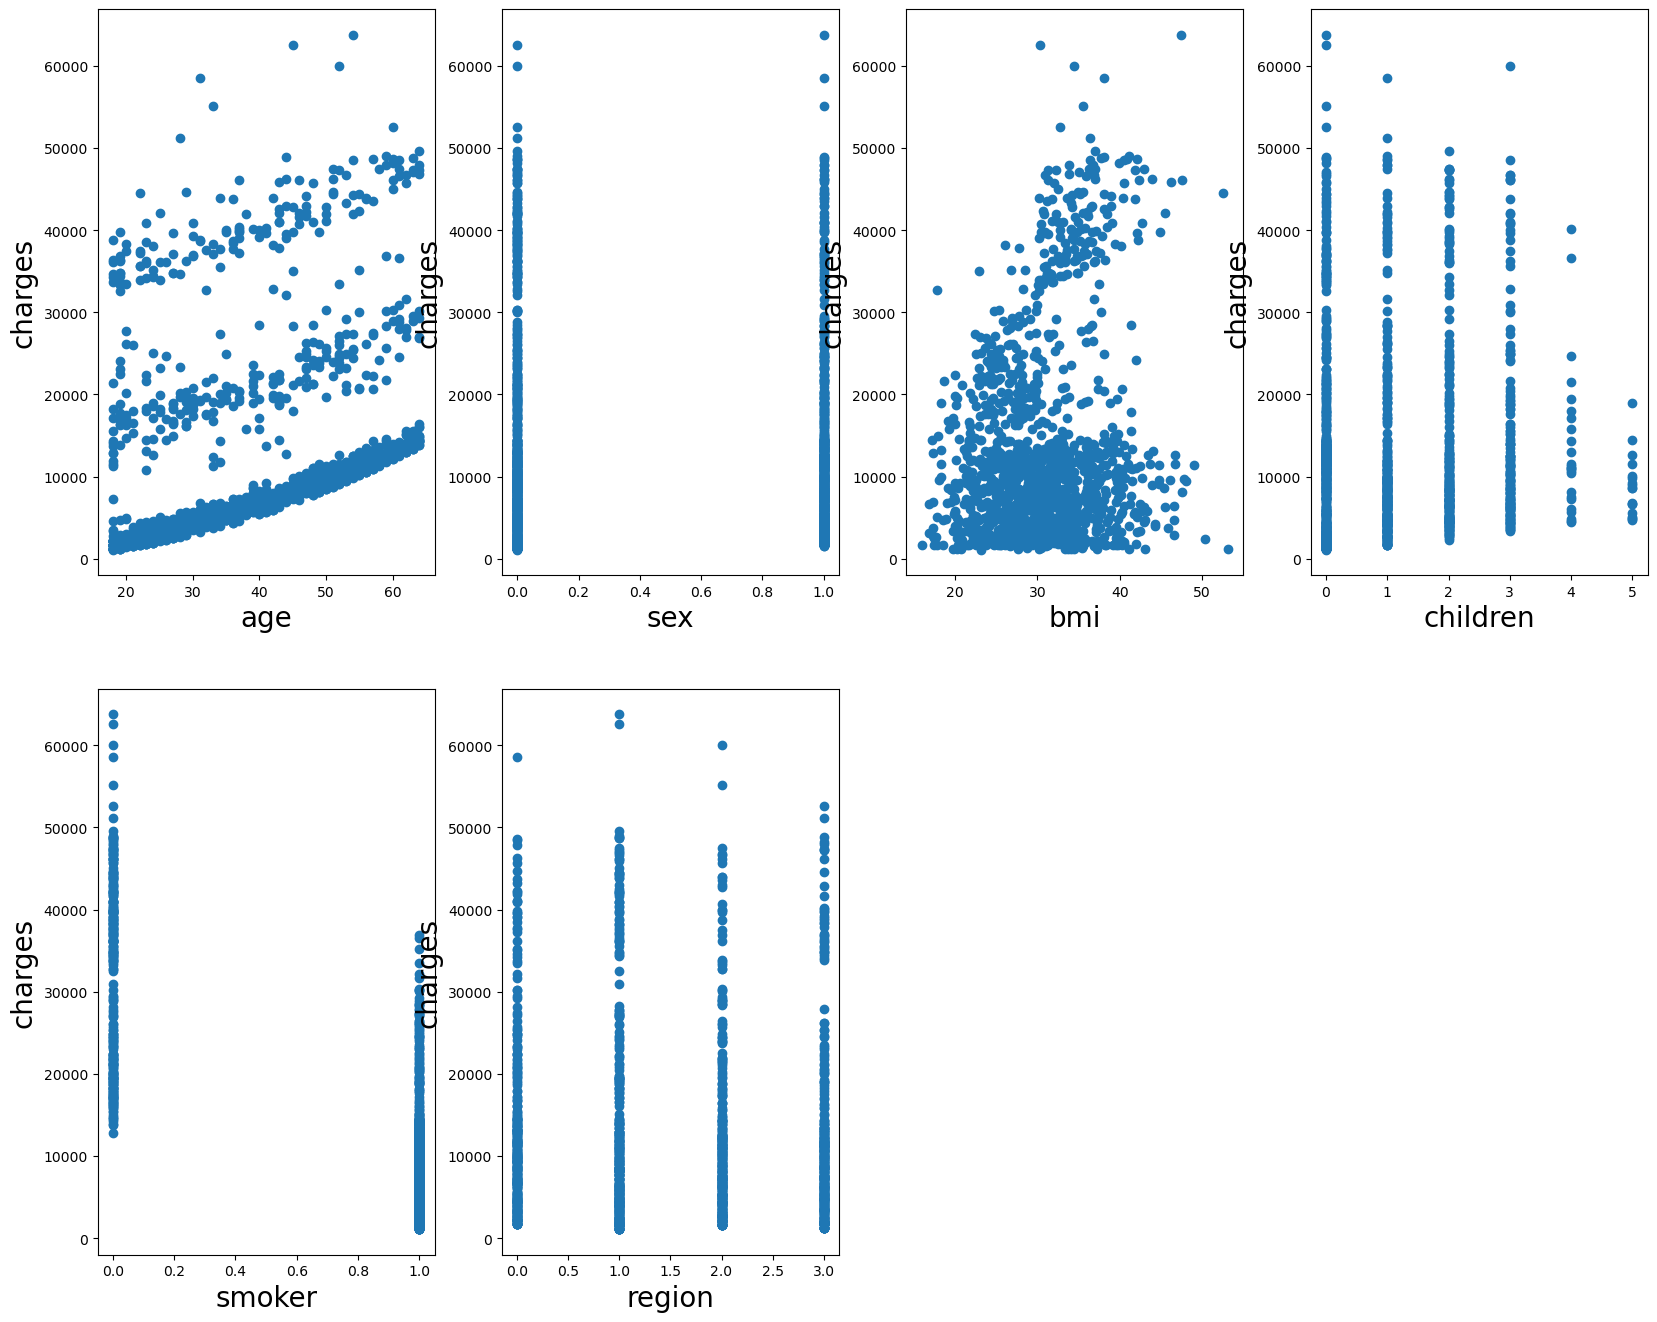

In [104]:
plt.figure(figsize=(20,25))
plotnumber = 1

for column in x :
    if plotnumber <= 6:
        ax = plt.subplot(3,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize = 20)
        plt.ylabel('charges',fontsize = 20)
        
    plotnumber +=1
plt.show()

In [124]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [125]:
x_scaled

array([[-1.43876426,  1.0105187 , -0.45332   , -0.90861367, -1.97058663,
         1.37025876],
       [-1.50996545, -0.98959079,  0.5096211 , -0.07876719,  0.5074631 ,
        -0.44051282],
       [-0.79795355, -0.98959079,  0.38330685,  1.58092576,  0.5074631 ,
        -0.44051282],
       ...,
       [-1.50996545,  1.0105187 ,  1.0148781 , -0.90861367,  0.5074631 ,
        -0.44051282],
       [-1.29636188,  1.0105187 , -0.79781341, -0.90861367,  0.5074631 ,
         1.37025876],
       [ 1.55168573,  1.0105187 , -0.26138796, -0.90861367, -1.97058663,
         0.46487297]])

In [127]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state = 947)

In [128]:
clf = LinearRegression()
clf.fit(x_train,y_train)

LinearRegression()

In [129]:
regression.score(x_train,y_train)

0.7528608307706711

In [130]:
regression.score(x_test,y_test)

0.7401568790368656

In [131]:
y_predict = regression.predict(x_test)
y_predict

array([30723.93961438,  9407.62930733,    85.85797289,  5443.5114582 ,
        4750.47249692, 10085.10258292,  7502.45517494, 11851.73474092,
        2748.04819822, 11066.31130272, 13060.00752   ,  8736.50529027,
        7147.77872777,  2268.00154382,  8933.33790014,  4089.43133918,
        4515.49252878,  7038.81190186,  4848.16778104, 16391.65558032,
        3735.8539831 ,  9596.15728567,  8681.45325632, 33871.18199019,
       10828.02019662,  6734.89401104, 12348.18852755, 13683.35297992,
        8756.78847841, 14793.64783025, 24844.11289658, 14199.42861261,
       25769.41609887,  1218.97274483, 38016.84128239, 13839.14066497,
        5331.28160562,  1601.43562338,  6012.97095907,  3535.58955233,
       12946.5984661 , 12758.0893833 , 32519.83746153,  7532.11001334,
       10011.94324348,  3285.61617215,  8072.38855612,  5297.14261738,
       35780.00800057, 33531.45754469,  3839.39012828,  5446.03925948,
       11626.32376327,  7833.64131695,  3161.08166534,  9669.54923366,
      

<function matplotlib.pyplot.show(close=None, block=None)>

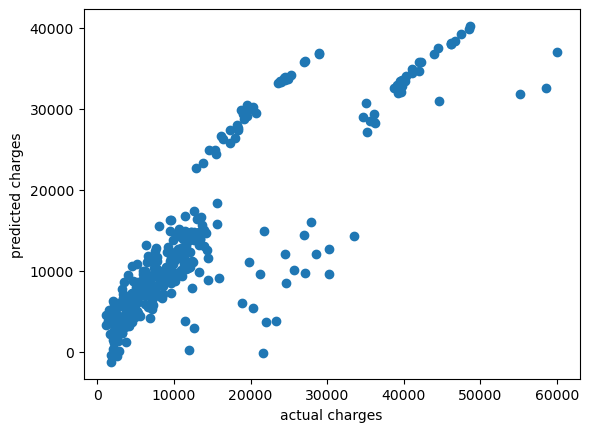

In [132]:
plt.scatter(y_test,y_predict)
plt.xlabel('actual charges')
plt.ylabel('predicted charges')
plt.show

In [133]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [134]:
mean_squared_error(y_test,y_predict)

38551107.79863066

In [135]:
mean_absolute_error(y_test,y_predict)

4256.065541256942